In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
Image_Size=256
CHANNELS=2
EPOCHS=3
Batch_Size=32
dataset=tf.keras.preprocessing.image_dataset_from_directory('Pepperbell',shuffle=True,image_size=(Image_Size,Image_Size),batch_size=Batch_Size)
dataset

Found 2475 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
class_names=dataset.class_names
class_names


['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

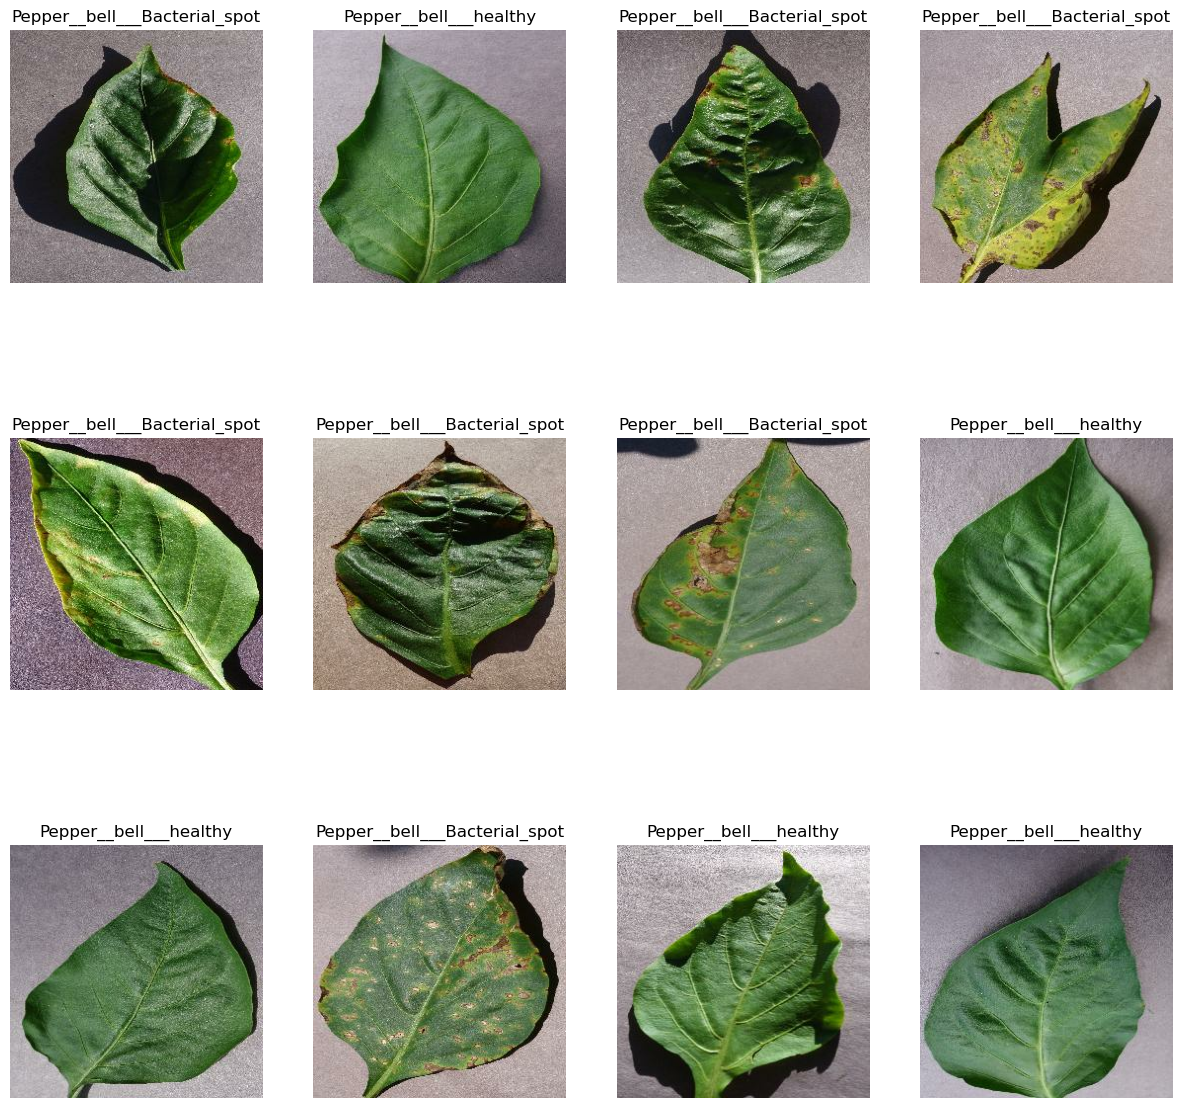

In [5]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off") 
plt.savefig('leaf1.jpg')

In [6]:
def get_partitions(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size + val_size)
    return train_ds,val_ds,test_ds


In [7]:
train_ds,val_ds,test_ds=get_partitions(dataset)
len(train_ds)

62

In [8]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [9]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [10]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
input_shape = (256, 256, 3)
n_classes =2

model = models.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
model.add(layers.experimental.preprocessing.Resizing(256, 256))
model.add(layers.Conv2D(32, (2, 2), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (2, 2), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (2, 2), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(n_classes, activation="softmax"))

model.build(input_shape=(None, 256, 256, 3))  # Set the input shape

model.summary()  # Print the model summary

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                  

In [12]:
model.compile(
 optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 metrics=['accuracy']
)

In [13]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=Batch_Size,
verbose=1,
validation_data=val_ds
)

Epoch 1/3
62/62 [==============================] - 236s 3s/step - loss: 0.5108 - accuracy: 0.7728 - val_loss: 0.2976 - val_accuracy: 0.8795
Epoch 2/3
62/62 [==============================] - 117s 2s/step - loss: 0.2223 - accuracy: 0.9068 - val_loss: 0.2371 - val_accuracy: 0.8661
Epoch 3/3
62/62 [==============================] - 115s 2s/step - loss: 0.1403 - accuracy: 0.9521 - val_loss: 0.1220 - val_accuracy: 0.9643


In [ ]:
scores=model.evaluate(test_ds)
scores

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend("lower right")
plt.title("Training VS Validation Accuracy")
plt.savefig('graph1.jpg')

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend("upper right")
plt.title("Training VS Validation Losses")
plt.savefig('graph2.jpg')

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend("lower right")
plt.title("Training VS Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend("upper right")
plt.title("Training VS Validation Losses")
plt.savefig('graph2.jpg')

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    print("My First image to Predictions")
    plt.imshow(first_image)
    print("actual label:-",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label:-",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [ ]:
def predict(model,img):
    image_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array=tf.expand_dims(image_array,0)
    predictions=model.predict(image_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:-{actual_class}\n Predicted:-{predicted_class}\n Confidence{confidence}%")
        plt.axis("off")
plt.savefig('leaf2.jpg')